# Anomaly Detection

<br />

There are 3 kinds of anomaly detections of time series data including outlier detection, abnormalities detection and change point detection.


On this sprint, I am going to implement KNN to do outlier detections.

## [Task 1] Research

    - Anomaly detection by KNN evaluates whether unknown data are regular or anomalous under a situation that there is a set of regular data of dimentional vectors.
    
    - If unknown data are far from the set of regilar data, it is possible that the unknown data are anomalous, and vice versa.
    
    - It is necessary to transform time series data to a set of vectors by taking any window width.

## [Task 2] Outlier Detection by KNN

<br />

I am going to do outlier detections for prices data of Bitcoin by KNN.

<br />

"仮想通貨(暗号通貨)４本値CSVゲッター from Cryptowatch"


http://nipper.work/btc/index.php?market=bitFlyer&coin=BTCJPY&periods=86400&after=1420070400

In [1]:
from statistics import mean, variance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [8]:
# Read the data

data = pd.read_csv("btc.csv", encoding="shift-jis", header=None)

In [24]:
# Check

data

,0,1,2,3,4,5
0,2017-05-21 00:00:00,232660,242460,231962,242460,231.863000
1,2017-05-22 00:00:00,243915,343303,236510,254214,309.532000
2,2017-05-23 00:00:00,256994,276003,256994,276002,4.940000
3,2017-05-24 00:00:00,284989,284989,275603,275603,0.002000
4,2017-05-25 00:00:00,302146,302146,300000,301050,1.050000
5,2017-05-26 00:00:00,303000,340000,270002,270002,17.010000
6,2017-05-27 00:00:00,349998,349998,194003,281061,21.613000
7,2017-05-28 00:00:00,269998,269999,210000,269999,2.120000
8,2017-05-29 00:00:00,269999,279999,210045,210046,7.623000
9,2017-05-30 00:00:00,270000,280000,265202,280000,3.321000


- Explanations of the columns


    - 0: Date and time
    
    - 1: Opening price
    
    - 2: Highest price
    
    - 3: Lowest price
    
    - 4: Closing price
    
    - 5: Volume

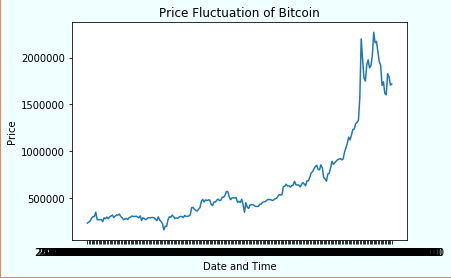

In [12]:
# Visualize the data

plt.figure(facecolor="azure", edgecolor="coral", linewidth=2)

plt.plot(data.iloc[:, 0], data.iloc[:, 1])

plt.title("Price Fluctuation of Bitcoin")
plt.xlabel('Date and Time')
plt.ylabel('Price')
plt.show()

In [38]:
# Implement KNN for time series data


def knn(data, wide, k):
    """
    data: dataframe

    wide: Width of a window

    k: Hyperparameter
    """

    anormaly_score = []

    # Let 110 data a train dataset, and let the rest a test dataset
    train = data.iloc[:110, 1]
    test = data.iloc[111:220, 1]

    # Split the datasets into windows whose width is "wide"
    train_window = embed(train, wide)
    test_window = embed(test, wide)

    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(train_window)
    d = neigh.kneighbors(test_window)

    anormaly_score = d[0]

    return anormaly_score


def embed(lst, dim):
    emb = np.empty((0, dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i:i+dim])[::-1].reshape((1, -1))
        emb = np.append(emb, tmp, axis=0)
    return emb

In [42]:
# Validate the definitions

anormaly_score = knn(data, 15, 1)

In [43]:
# Check

anormaly_score

array([[ 201760.0223062 ],
       [ 184256.75107577],
       [ 173065.62956867],
       [ 171479.76913327],
       [ 154087.38162484],
       [ 139561.61842355],
       [ 130297.06610665],
       [ 120043.21803417],
       [ 114069.92572979],
       [ 125829.04257762],
       [ 123436.19846706],
       [ 113072.96357662],
       [ 111527.2336786 ],
       [  98485.68595486],
       [  96600.34800144],
       [  87654.24456351],
       [ 117330.62054724],
       [ 131520.8227088 ],
       [ 178297.50385802],
       [ 211467.73479186],
       [ 247489.84898375],
       [ 277021.90814085],
       [ 301550.47625729],
       [ 330750.91447039],
       [ 372545.75521807],
       [ 398295.64072809],
       [ 423573.2459115 ],
       [ 453933.31205916],
       [ 474317.46251851],
       [ 492977.18695189],
       [ 517324.28323538],
       [ 523616.52905633],
       [ 527116.67065366],
       [ 540238.70713139],
       [ 559390.03661935],
       [ 587240.43191609],
       [ 631637.75497115],
 

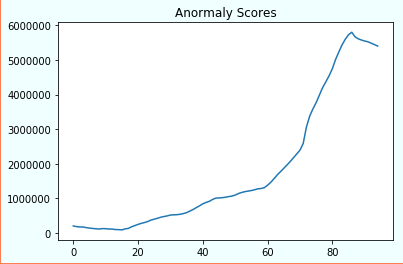

In [44]:
# Plot the results

plt.figure(facecolor="azure", edgecolor="coral", linewidth=2)

plt.plot(anormaly_score)

plt.title("Anormaly Scores")
plt.show()